In [1]:
#import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import glob

In [2]:
deeplabv3plus_dir="./src"
sys.path.append(deeplabv3plus_dir)

In [3]:
gpu_options = tf.compat.v1.GPUOptions(visible_device_list="3", allow_growth=True)
config = tf.compat.v1.ConfigProto(gpu_options = gpu_options)
tf.compat.v1.enable_eager_execution(config=config)

In [4]:
#from model import deeplab_v3plus
from data_utils import make_x_from_data_paths,make_y_from_data_paths,convert_y_to_image_array
from data_gen import DataGenerator
from label import Label

In [5]:
traindata_dir = '../kaigan_block/dataset/poly/train'
testdata_dir = '../kaigan_block/dataset/x_test2'

train_x_paths = glob.glob(os.path.join(traindata_dir,'*.jpg'))
train_x_paths.sort()
image_names = [os.path.basename(train_x_paths[i]).split('.')[0] for i in range(len(train_x_paths))]
train_y_paths=[]
for i, image_name in enumerate(image_names):
    p = os.path.join(traindata_dir, image_name+'.json')
    if os.path.exists(p):
        train_y_paths.append(p)
    else:
        train_y_paths.append(None)

In [6]:
'''
seg_img_dir = "../pascal_voc_2012_datasets/VOCdevkit/VOC2012/SegmentationClass"
img_dir = "../pascal_voc_2012_datasets/VOCdevkit/VOC2012/JPEGImages"
train_set_path = "../pascal_voc_2012_datasets/VOCdevkit/VOC2012/ImageSets/Segmentation/train.txt"
valid_set_path = "../pascal_voc_2012_datasets/VOCdevkit/VOC2012/ImageSets/Segmentation/val.txt"

with open(train_set_path) as f:
    train_img_names = f.read().split("\n")[:-1]
with open(valid_set_path) as f:
    valid_img_names = f.read().split("\n")[:-1]

img_paths = [os.path.join(img_dir,train_img_names[i]) + ".jpg" for i in range(len(train_img_names))]
seg_img_paths = [os.path.join(seg_img_dir,train_img_names[i]) + ".png" for i in range(len(train_img_names))]

valid_x_paths = [os.path.join(img_dir,valid_img_names[i]) + ".jpg" for i in range(len(valid_img_names))]
valid_y_paths = [os.path.join(seg_img_dir,valid_img_names[i]) + ".png" for i in range(len(valid_img_names))]
#valid_x_paths = [os.path.join(img_dir,train_img_names[i]) + ".jpg" for i in range(len(train_img_names))][0:10]
#valid_y_paths = [os.path.join(seg_img_dir,train_img_names[i]) + ".png" for i in range(len(train_img_names))][0:10]
'''

'\nseg_img_dir = "../pascal_voc_2012_datasets/VOCdevkit/VOC2012/SegmentationClass"\nimg_dir = "../pascal_voc_2012_datasets/VOCdevkit/VOC2012/JPEGImages"\ntrain_set_path = "../pascal_voc_2012_datasets/VOCdevkit/VOC2012/ImageSets/Segmentation/train.txt"\nvalid_set_path = "../pascal_voc_2012_datasets/VOCdevkit/VOC2012/ImageSets/Segmentation/val.txt"\n\nwith open(train_set_path) as f:\n    train_img_names = f.read().split("\n")[:-1]\nwith open(valid_set_path) as f:\n    valid_img_names = f.read().split("\n")[:-1]\n\nimg_paths = [os.path.join(img_dir,train_img_names[i]) + ".jpg" for i in range(len(train_img_names))]\nseg_img_paths = [os.path.join(seg_img_dir,train_img_names[i]) + ".png" for i in range(len(train_img_names))]\n\nvalid_x_paths = [os.path.join(img_dir,valid_img_names[i]) + ".jpg" for i in range(len(valid_img_names))]\nvalid_y_paths = [os.path.join(seg_img_dir,valid_img_names[i]) + ".png" for i in range(len(valid_img_names))]\n#valid_x_paths = [os.path.join(img_dir,train_img_nam

In [7]:
label_file_path = os.path.join(traindata_dir, 'label_list.csv')
label = Label(label_file_path)
image_size = (512,512)

In [8]:
batch_size = 8
preprocess = keras.applications.xception.preprocess_input

In [9]:
train_data_gen = DataGenerator(train_x_paths, train_y_paths, image_size, label, batch_size, preprocess, augmentation=True, shuffle=True, data_type="polygon")

In [10]:
x,y0 = train_data_gen.__getitem__(0)

In [11]:
x = (x+1)/2
y =convert_y_to_image_array(y0, image_size, label)

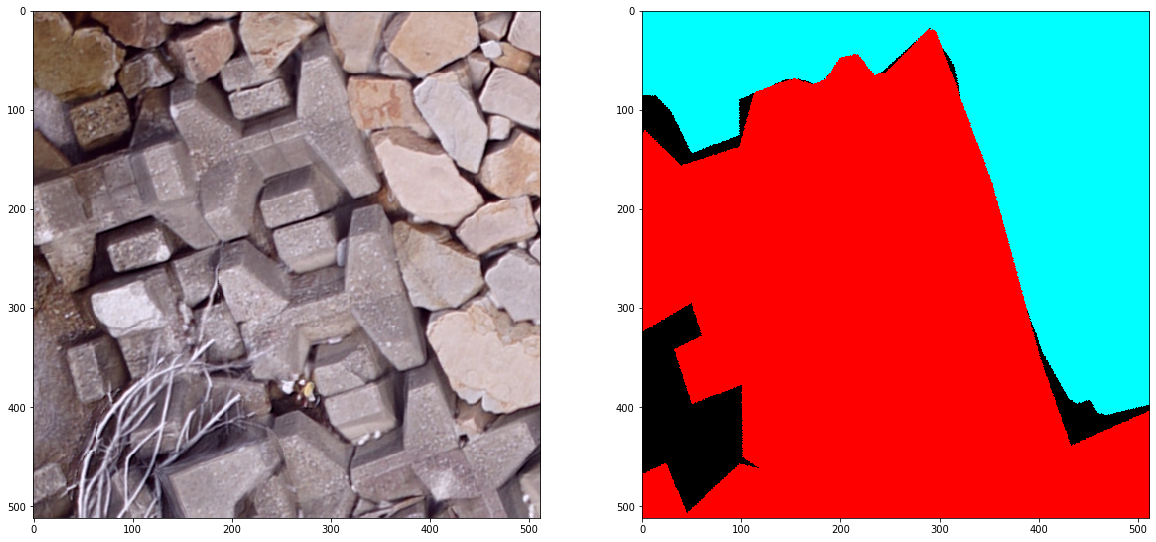

In [14]:
i=
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(x[i,:,:,:])
plt.subplot(1,2,2)
plt.imshow(y[i])

# Augmentor test

In [ ]:
from albumentations import *

In [ ]:
x = make_x_from_image_paths(img_paths[0:10], image_size)
y = make_y_from_image_paths(seg_img_paths[0:10], image_size, n_categories)

In [ ]:
i=1
#aug=RandomCrop(p=1, height=300, width=300)
#aug=ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=1)
aug=Compose([HueSaturationValue(p=1)],p=1)
img=aug(image=x[i,:,:,:])["image"]

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(x[i,:,:,:])
plt.subplot(1,2,2)
plt.imshow(img)